In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *
from tabulate import tabulate

/home/jw3514/anaconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [5]:
HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
Z2Mat = pd.read_csv("../dat/allen-mouse-exp//AllenMouseBrain_Z2bias.csv", index_col=0)
allen_mouse_genes = Z2Mat.index.values
BGMR = pd.read_csv("~/Work/Resources/MutationRate_20170710_rate.txt", delimiter="\t")
BGMR["Entrez"] = [int(GeneSymbol2Entrez.get(x, -1)) for x in BGMR["GeneName"].values]
BGMR = BGMR[BGMR["Entrez"].isin(allen_mouse_genes)]
BGMR.index = BGMR["Entrez"].values
BGMR["Mutability_Dmg"] = BGMR["p_LGD"] + BGMR["prevel_0.5"]
BGMR["Mutability_syn"] = BGMR["p_synonymous"]

/tmp/ipykernel_3260590/1349915247.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  BGMR = pd.read_csv("~/Work/Resources/MutationRate_20170710_rate.txt", delimiter="\t")
/tmp/ipykernel_3260590/1349915247.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BGMR["Mutability_Dmg"] = BGMR["p_LGD"] + BGMR["prevel_0.5"]
/tmp/ipykernel_3260590/1349915247.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BGMR["Mutability_syn"] = BGMR["p_synonymous"]


In [9]:
BGMR.head(2)

,#Reference,GeneVersion,Transcript.TranscriptVersion,ExonCount,Chr,StartPos,EndPos,GeneName,p_synonymous,p_misense,...,0.7,0.75,0.8,0.85,0.9,0.95,0.56,Entrez,Mutability_Dmg,Mutability_syn
55344,>hg19,wgEncodeGencodeBasicV19,ENST00000381657,5,X,200852,216005,PLCXD1,0.000008,0.000015,...,5.117010e-07,4.081868e-07,3.877915e-07,2.665134e-07,1.323599e-07,2.553236e-08,5.510965e-07,55344,0.000002,0.000008
28227,>hg19,wgEncodeGencodeBasicV19,ENST00000390665,12,X,295099,347429,PPP2R3B,0.000017,0.000028,...,2.274970e-06,1.627129e-06,1.317029e-06,1.074042e-06,3.170196e-07,3.219619e-08,3.546518e-06,28227,0.000003,0.000017


### Correlation between Mut Rate and Mut cont of Sibling

In [8]:
SiblingDF = pd.read_csv("../scripts/dat/ASD_Siblings.csv")
SiblingDF.head(2)

,HGNC,Entrez,N_LGD,N_Mis,N_Dmis,N_Syn
0,ZNF679,168417,0,2,0,0
1,ARHGAP12,94134,0,1,1,0


In [16]:
Mut_rate = []
Mut_count = []
for i, row in SiblingDF.iterrows():
    entrez = row["Entrez"]
    Muts = row["N_LGD"] + row["N_Dmis"]
    #print(entrez)
    if Muts > 0 and entrez in BGMR.index.values:
        Mut_rate.append(BGMR.loc[entrez, "Mutability_Dmg"])
        Mut_count.append(Muts)

1234


(0.41648219742771325, 5.897545827526664e-53)

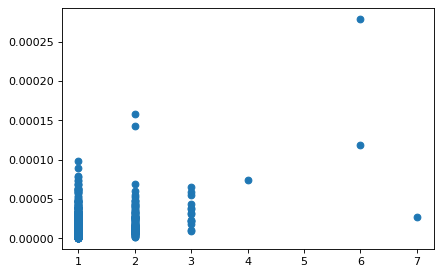

In [20]:
print(len(Mut_count))
plt.scatter(Mut_count, Mut_rate)
pearsonr(Mut_count, Mut_rate)

### Simulations

In [26]:
meta = pd.read_csv("/home/jw3514/Work/ASD_Circuits/scripts/dat/meta_denovo_simulations.csv", 
                   index_col="index")

In [27]:
meta.head(2)

,1,2,131076,12,13,14,15,16,18,163859,...,196513,196527,196528,196541,163782,163786,6503,131034,327657,201895
index,,,,,,,,,,,,,,,,,,,,,
0,"0,0","0,1","0,0","0,0","0,0","0,0","0,0","0,0","0,1","1,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,0"
1,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","1,0","0,1","0,0",...,"0,0","0,0","0,0","0,0","0,0","0,0","0,0","0,1","0,0","0,0"


2680
(0.5524543134542409, 4.9066721256639954e-214)


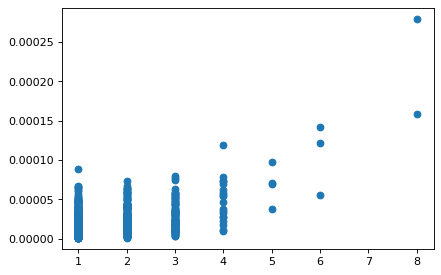

2622
(0.5141661127070426, 6.419811342711156e-177)


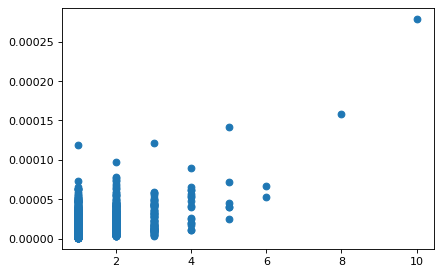

2623
(0.5246723060281221, 1.677422782141305e-185)


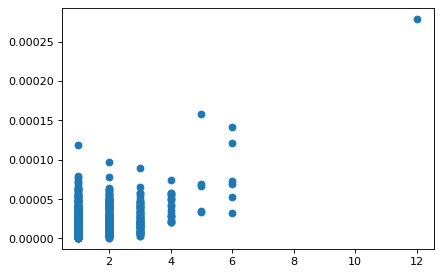

2736
(0.5424840373969825, 3.3246572270600715e-209)


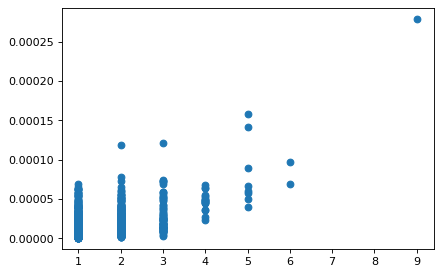

2762
(0.4997723876371246, 1.7724046034517161e-174)


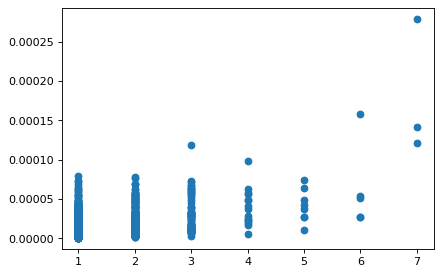

2614
(0.5489101173592293, 1.2455354733258937e-205)


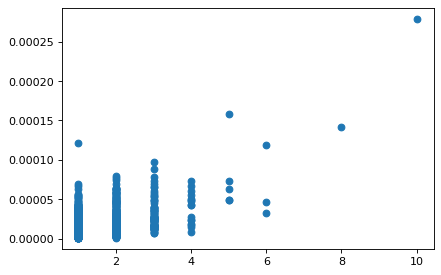

2516
(0.5325550264864957, 2.4783037772146957e-184)


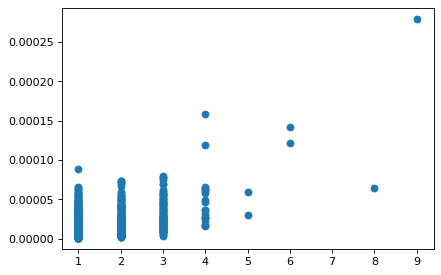

In [40]:
def xxx(genes, values, BGMR):
    
    Mut_rate = []
    Mut_count = []
    for entrez, value in zip(genes, values):
        #print(entrez, value)
        Muts = np.sum([int(x) for x in value.split(",")])
        #print(Muts)
        if Muts > 0 and int(entrez) in BGMR.index.values:
            Mut_rate.append(BGMR.loc[int(entrez), "Mutability_Dmg"])
            Mut_count.append(Muts)
    print(len(Mut_count))
    plt.scatter(Mut_count, Mut_rate)
    print(pearsonr(Mut_count, Mut_rate))
    plt.show()
    
for i, row in meta.iterrows():
    xxx(meta.columns, row, BGMR)
    if i > 5:
        break